In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import math
from scipy import stats
import seaborn as sns

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

# Print the following string in .md syntax
def printmd(string):
    display(Markdown(string))

#DEATILS OF THE DATASET
 ---------------------------------------
 
   The dataset we've choosen is related to stats of players playing in a various league around the globe every year.
   This dataset contains stats of basketball players for over 20 seasons from 1999-2000 to 2019-2020.

1. League - Basketball Leagues played around the Globe.

2. Season - Year in which the league takes place.

3. Stage - Which part of the league we are taking into account.

4. Player - The player playing in that particular League.

5. Team - The team which the players plays for.

6. Birth_Month

7. Birth_date

8. Height - Height of the player.

9. Nationality - The status of belonging to a particular nation.

10. High_School - High School team represented by the player.

11. Games_played - Number of games played by the player in that season.

12. Minutes - Number of minutes played by a player in that season.

13. FG_made - (FG)Field Goals, number of shots made by a player.

14. FG_attempted - Number of shots attempted by the player.

15. 3_Pointer_Made - Number of 3 pointer shots made by a player.

16. 3_Pointer_Attempted - Number of 3 pointer shots taken by the player in a season.

17. FT_Made - Number of free throws made by a player. (FT - FREE THROW - number of shots given to a player when foul is called 
    in shooting action) 
    
18. FT_Attempted - Number of free throws attempted by a player.

19. Turnovers - Occurs when a team loses possesion of the ball to the opposing team before a player takes shot at their team's 
    basket.
    
20. Fouls - Any player whose actions against an opponent cause illegal contact with yet another	 opponent.

21. Off_Reb - Number of rebounds taken in offesive end.

22. Def_Reb - Number of rebounds taken on defensive end.

23. Total_Reb - Off_Reb + Def_Ref.

24. Assists - Number of assists recorded by a player.(an assist is attributed to a player who passes the ball to a teammate in 
    away that leads to a score by field goal).
    
25. Steals - Number of steals made by a defensive player(a steal occurs when a defensive player	 legally causes a turnover by 
    his positive, aggressive action(s)).
    
26. Blocks - Number of rejections made by a defensive player(occurs when a defensive player	 legally deflects a field goal 
    attempt from an offensive player to prevent a score).
    
27. Points - Total points scored by a player in that season.

28. Height_in_cm - Height of the player in centimetres.

29. Weight - weight of the player.

30. Weight_in_kg - Weight of the player in Kg.

In [11]:
nba_data = pd.read_csv('DIRTY_NBAFINAL_DATA.csv')

In [12]:
nba_data.head()

,Unnamed: 0,Unnamed: 0.1,League,Season,Stage,Player,Team,Birth_Month,Birth_date,Height,...,Off_Reb,Def_Reb,Total_Reb,Assists,Steals,Blocks,Points,Height_in_cm,Weight,Weight_in_Kg
0,0,0,NBA,20 - 2020,Regular_Season,James Harden,HOU,Aug,"Aug 26, 89",06-May,...,70.0,376.0,446.0,512.0,125.0,NaN,35.0,6.0,NaN,100.0
1,1,1,NBA,20 - 2020,Regular_Season,Damian Lillard,POR,Jul,"Jul 15, 90",06-Mar,...,33.0,251.0,NaN,530.0,70.0,22.0,78.0,1.0,NaN,88.0
2,2,2,NBA,20 - 2020,Regular_Season,Devin Booker,PHX,Oct,"Oct 30, 96",06-Jun,...,29.0,268.0,NaN,NaN,49.0,18.0,1863.0,8.0,206.0,93.0
3,3,3,NBA,20 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,Dec,"Dec 6, 94",06-Nov,...,1.0,716.0,856.0,354.0,61.0,66.0,1857.0,211.0,242.0,110.0
4,4,4,NBA,20 - 2020,Regular_Season,Trae Young,ATL,Sep,"Sep , 98",06-Feb,...,32.0,2.0,255.0,560.0,65.0,8.0,1778.0,188.0,180.0,82.0


In [13]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53798 entries, 0 to 53797
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           53798 non-null  int64  
 1   Unnamed: 0.1         53798 non-null  int64  
 2   League               53798 non-null  object 
 3   Season               53798 non-null  object 
 4   Stage                53798 non-null  object 
 5   Player               53798 non-null  object 
 6   Team                 53787 non-null  object 
 7   Birth_Month          53479 non-null  object 
 8   Birth_date           53479 non-null  object 
 9   Height               53724 non-null  object 
 10  Nationality          53791 non-null  object 
 11  High_School          23551 non-null  object 
 12  Games_played         50811 non-null  float64
 13  Minutes              53743 non-null  float64
 14  FG_made              50077 non-null  float64
 15  FG_Attempted         50700 non-null 

In [14]:
nba_data.isnull().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
League                     0
Season                     0
Stage                      0
Player                     0
Team                      11
Birth_Month              319
Birth_date               319
Height                    74
Nationality                7
High_School            30247
Games_played            2987
Minutes                   55
FG_made                 3721
FG_Attempted            3098
3_Pointer_Made          4667
3_Pointer_Attempted     3723
FT_Made                 4661
FT_Attempted            4127
Turnovers               4862
Fouls                   4229
Off_Reb                 4931
Def_Reb                 4029
Total_Reb               3752
Assists                 4685
Steals                  5352
Blocks                  3482
Points                  2937
Height_in_cm            2444
Weight                  9651
Weight_in_Kg            6781
dtype: int64

<AxesSubplot:>

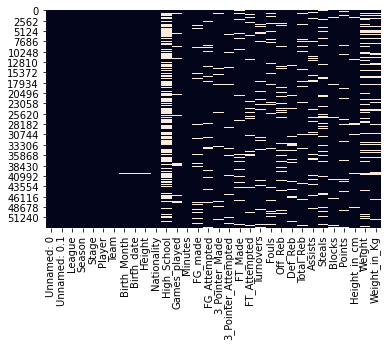

In [15]:
sns.heatmap(nba_data.isnull(), cbar=False)

# Categorical data

High_School -  The missing values in this column clearly indicates that players haven't played for High School teams.
                Therefore we replace the NaN values with "No School"

In [16]:
nba_data['High_School'].fillna('No School',inplace=True)

# Dropping out the unwanted columns present in the dataset.

Unnamed: 0.                                                                                                                
Unnamed: 0.1.                                                                                                              
Height -contains Date of birth which is irrelevant data.                                                                 
Weight - Repetitve data as Weight_in_Kg already exists.  
Birth_Month - Repetitive data

In [17]:
nba_data = nba_data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Height','Weight','Birth_Month'])

In [18]:
nba_data.head()

,League,Season,Stage,Player,Team,Birth_date,Nationality,High_School,Games_played,Minutes,...,Fouls,Off_Reb,Def_Reb,Total_Reb,Assists,Steals,Blocks,Points,Height_in_cm,Weight_in_Kg
0,NBA,20 - 2020,Regular_Season,James Harden,HOU,"Aug 26, 89",United States,Artesia High School,68.0,2482.6,...,227.0,70.0,376.0,446.0,512.0,125.0,NaN,35.0,6.0,100.0
1,NBA,20 - 2020,Regular_Season,Damian Lillard,POR,"Jul 15, 90",United States,Oakland High School,66.0,2473.7,...,114.0,33.0,251.0,NaN,530.0,70.0,22.0,78.0,1.0,88.0
2,NBA,20 - 2020,Regular_Season,Devin Booker,PHX,"Oct 30, 96",United States,Moss Point High School,70.0,2511.8,...,213.0,29.0,268.0,NaN,NaN,49.0,18.0,1863.0,8.0,93.0
3,NBA,20 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,"Dec 6, 94",Greece / Nigeria,No School,63.0,16.9,...,5.0,1.0,716.0,856.0,354.0,61.0,66.0,1857.0,211.0,110.0
4,NBA,20 - 2020,Regular_Season,Trae Young,ATL,"Sep , 98",United States,Norman High School,60.0,2120.1,...,104.0,32.0,2.0,255.0,560.0,65.0,8.0,1778.0,188.0,82.0


# Irrelevant Data

Column Height -  As you see height of 19746 observations(players) is less than 100.0 cm . Therefore we replace these values with 
                the median of the heights.

In [19]:
count = 0
for i in range(53797):
    if(nba_data['Height_in_cm'][i]<100.0):
        count = count+1
print(count)

19023


In [20]:
median_height = nba_data['Height_in_cm'].median()
for i in range(53797):
    if(nba_data['Height_in_cm'][i]<100.0):
        nba_data['Height_in_cm'][i] = median_height

#Missing values  -- NUMERICAL DATA
 --------------

In [21]:
missing_values = ['FG_made','3_Pointer_Made','FT_Made','FG_Attempted','3_Pointer_Attempted','FT_Attempted','Points','Height_in_cm','Weight_in_Kg']
for i in missing_values:
    nba_data[i].fillna(nba_data[i].mean(), inplace=True)


In [22]:
missing_values = ['Games_played','Minutes','Turnovers','Fouls','Assists','Steals','Blocks']
for i in missing_values:
    nba_data[i].fillna(nba_data[i].median(), inplace=True)

In [23]:
nba_data.isnull().sum()

League                    0
Season                    0
Stage                     0
Player                    0
Team                     11
Birth_date              319
Nationality               7
High_School               0
Games_played              0
Minutes                   0
FG_made                   0
FG_Attempted              0
3_Pointer_Made            0
3_Pointer_Attempted       0
FT_Made                   0
FT_Attempted              0
Turnovers                 0
Fouls                     0
Off_Reb                4931
Def_Reb                4029
Total_Reb              3752
Assists                   0
Steals                    0
Blocks                    0
Points                    0
Height_in_cm              0
Weight_in_Kg              0
dtype: int64

In [24]:
off_mode = nba_data['Off_Reb'].mode().iloc[0]
nba_data['Off_Reb'].fillna(off_mode,inplace=True)
def_mode = nba_data['Def_Reb'].mode().iloc[0]
nba_data['Def_Reb'].fillna(def_mode,inplace=True)

# For Total_Reb the missing values is equal to Def_Reb + Off_Reb

In [25]:
for i in range(0,53798):
    nba_data['Total_Reb'][i] = nba_data['Def_Reb'][i]+ nba_data['Off_Reb'][i]

In [26]:
nba_data.isnull().sum()

League                   0
Season                   0
Stage                    0
Player                   0
Team                    11
Birth_date             319
Nationality              7
High_School              0
Games_played             0
Minutes                  0
FG_made                  0
FG_Attempted             0
3_Pointer_Made           0
3_Pointer_Attempted      0
FT_Made                  0
FT_Attempted             0
Turnovers                0
Fouls                    0
Off_Reb                  0
Def_Reb                  0
Total_Reb                0
Assists                  0
Steals                   0
Blocks                   0
Points                   0
Height_in_cm             0
Weight_in_Kg             0
dtype: int64

In [27]:
count = 0
for i in range(1,53798):
    if(nba_data['Nationality'][i] == "us"):
        count = count+1
        
print(count)

298


# To fix typos - United States - "us"

In [28]:
for i in range(1,53798):
    if(nba_data['Nationality'][i] == "us"):
        nba_data['Nationality'][i] = "United States"

# Missing teams in column Team is filled with forward fill method.

In [29]:
nba_data["Team"].fillna( method ='ffill', inplace = True)

# Missing values in Nationality and Birth_Date can be taken as player with no identity. Therefore we delete all the rows with such missing values.

In [30]:
nba_data = nba_data.dropna(axis=0)

In [31]:
nba_data.isnull().sum()

League                 0
Season                 0
Stage                  0
Player                 0
Team                   0
Birth_date             0
Nationality            0
High_School            0
Games_played           0
Minutes                0
FG_made                0
FG_Attempted           0
3_Pointer_Made         0
3_Pointer_Attempted    0
FT_Made                0
FT_Attempted           0
Turnovers              0
Fouls                  0
Off_Reb                0
Def_Reb                0
Total_Reb              0
Assists                0
Steals                 0
Blocks                 0
Points                 0
Height_in_cm           0
Weight_in_Kg           0
dtype: int64

In [32]:
nba_data.shape

(53473, 27)

<AxesSubplot:>

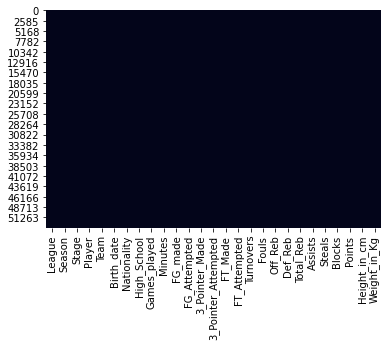

In [33]:
sns.heatmap(nba_data.isnull(), cbar=False)

In [34]:
nba_data.to_csv("cleaned_nba_data.csv")

# DATA VISUALISATION

In [42]:
#loading the dataset
df = pd.read_csv("new.csv")
print(df.head())
df.shape


                League       Season          Stage            Player Team  \
0              Eurocup  2016 - 2017  International     Petar Popovic  BUD   
1          Chinese-CBA    2018 - 20  International      Brandon Bass  LIA   
2              Eurocup  2015 - 2016  International      Yogev Ohayon  MAC   
3          Chinese-CBA    2018 - 20  International  Shabazz Muhammad  SZD   
4  Swedish-Basketligan  2013 - 2014  International  Mantas Griskenas  SOD   

   Birth_date    Nationality                High_School  Games_played  \
0  Sep 13, 96     Montenegro                  No School           8.0   
1  Apr 30, 85  United States        Capitol High School          53.0   
2  Apr 24, 87         Israel                  No School           2.0   
3  Nov 13, 92  United States  Bishop Gorman High School          41.0   
4   May 4, 85      Lithuania                  No School          52.0   

   Minutes  ...  Fouls  Off_Reb  Def_Reb  Total_Reb  Assists  Steals  Blocks  \
0    157.9  ...   

(5347, 27)

# Removing Outliers

1. Numeric (using box plot)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


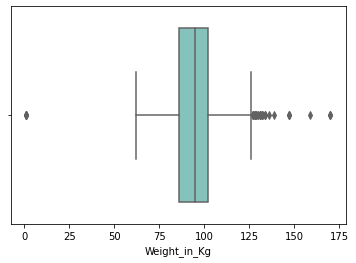

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


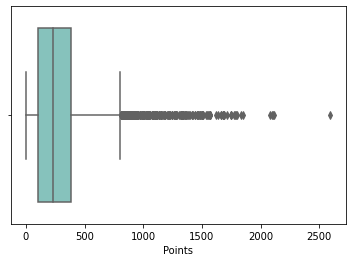

In [43]:
#Representation of the graph before removing outliers
sns.boxplot(df['Weight_in_Kg'],palette='GnBu_r')
plt.show()

sns.boxplot(df['Points'],palette='GnBu_r')
plt.show()


In [44]:
#Calculating the quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Games_played            19.00
Minutes                628.25
FG_made                 90.00
FG_Attempted           217.00
3_Pointer_Made          36.00
3_Pointer_Attempted     94.00
FT_Made                 51.00
FT_Attempted            65.00
Turnovers               37.00
Fouls                   53.00
Off_Reb                 34.00
Def_Reb                 76.00
Total_Reb              100.00
Assists                 55.00
Steals                  23.00
Blocks                  10.00
Points                 283.00
Height_in_cm            15.00
Weight_in_Kg            16.00
dtype: float64


In [45]:
print('No. of observations before eliminating the outliers:',len(df))
init_dfa_len=len(df)

# Removal of outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('No. of observations after eliminating the outliers:',len(df))
final_dfa_len=len(df)

print('Therefore we have found ', init_dfa_len-final_dfa_len ,' outliers')



No. of observations before eliminating the outliers: 5347
No. of observations after eliminating the outliers: 4178
Therefore we have found  1169  outliers


<ipython-input-45-f57e7ee4d1e9>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-45-f57e7ee4d1e9>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


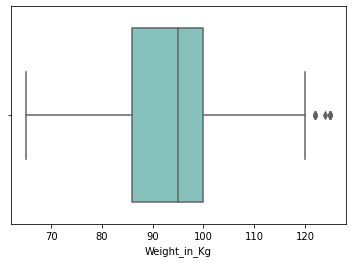

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


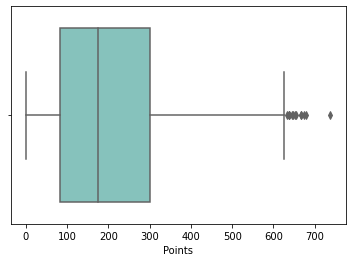

In [46]:
#Representation of the graph after removing outliers
sns.boxplot(df['Weight_in_Kg'],palette='GnBu_r')
plt.show()

sns.boxplot(df['Points'],palette='GnBu_r')
plt.show()

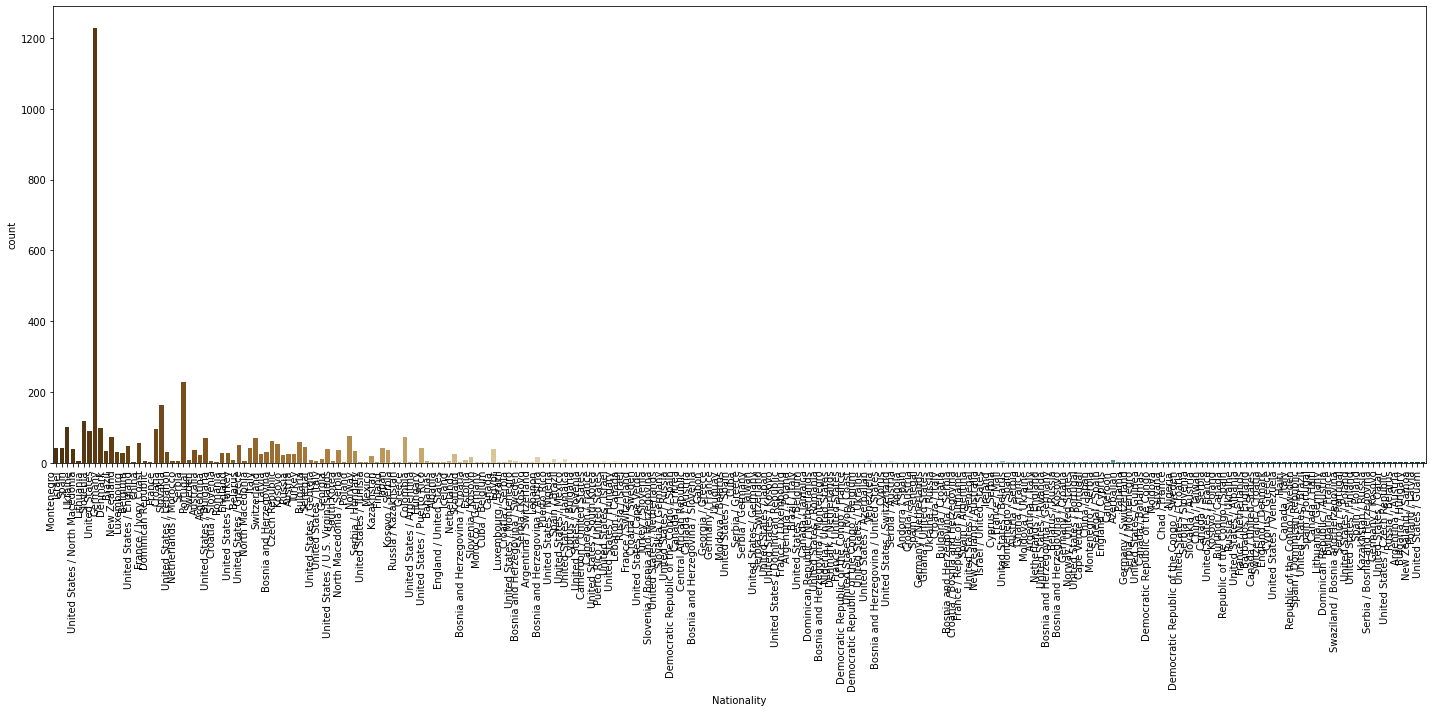

In [47]:
#Graph of Country of Origin before removing outliers
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Nationality", data=df,palette='BrBG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


In [48]:
#Removing categorical outliers
print('No. of observations before eliminating the outliers:',len(df))
init_len=len(df)

counts = df['Team'].value_counts()
df = df.loc[df['Team'].isin(counts.index[counts > 10])]
count = df['Nationality'].value_counts()
df = df.loc[df['Nationality'].isin(count.index[count > 20])]

print('No. of observations after eliminating the outliers:',len(df))
final_len=len(df)

print('Therefore we have found ', init_len-final_len ,' outliers')



No. of observations before eliminating the outliers: 4178
No. of observations after eliminating the outliers: 1424
Therefore we have found  2754  outliers


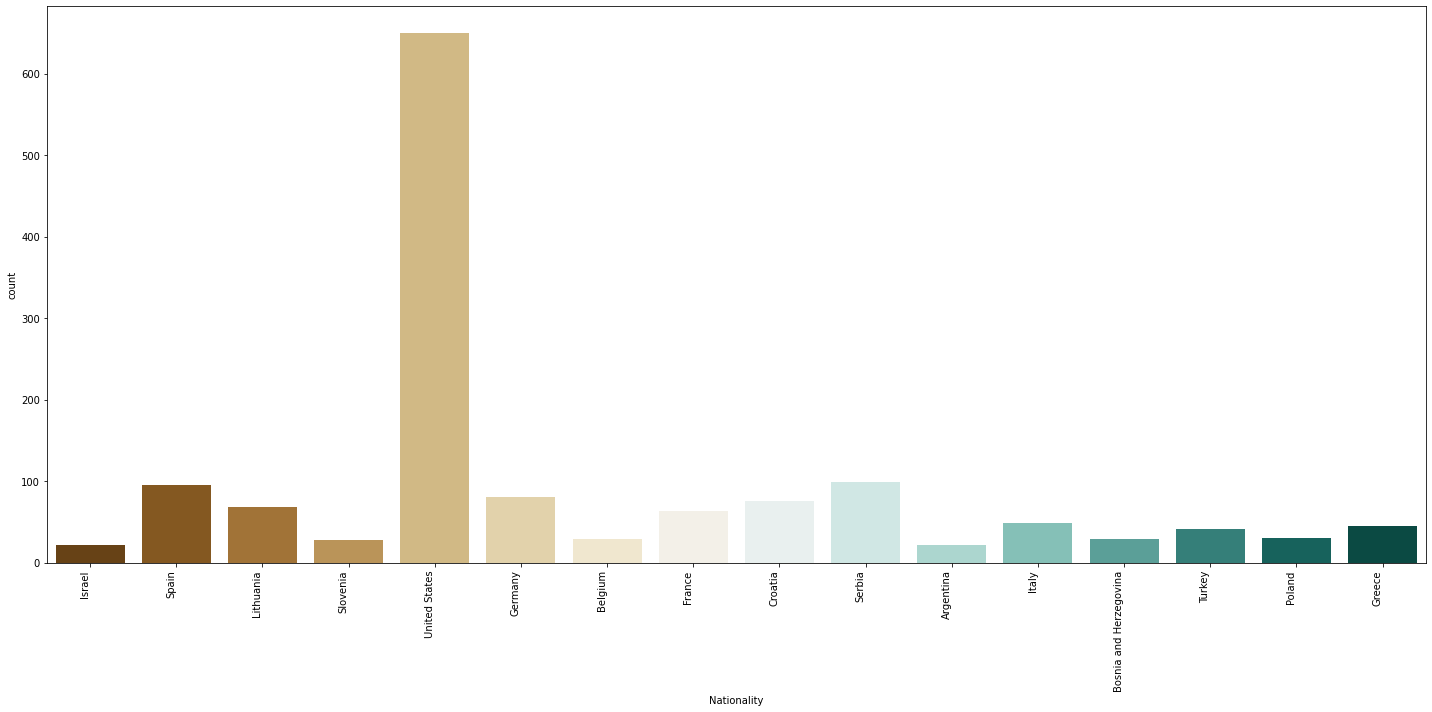

In [49]:
#Graph of Country of Origin after removing outliers
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Nationality", data=df,palette='BrBG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


# Graphical VIsualisation

1. Bar chart

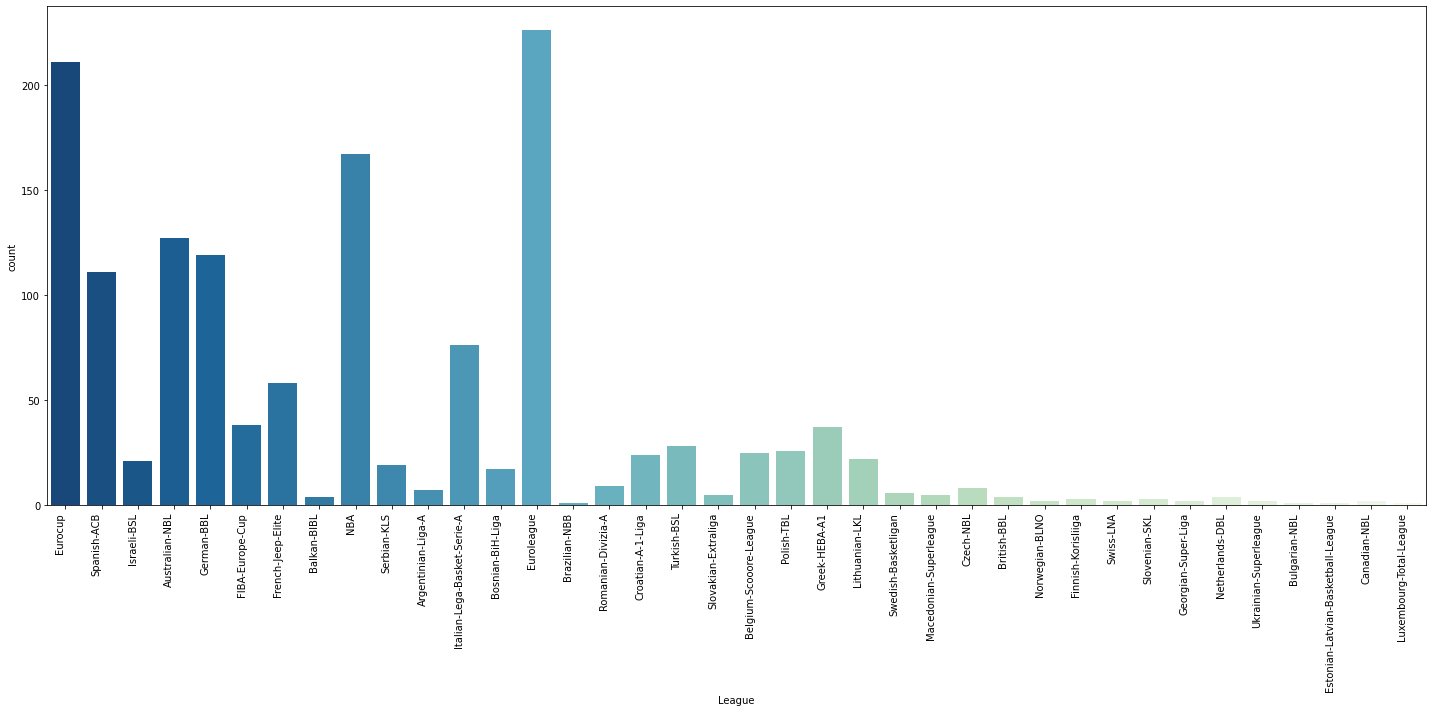

In [50]:
#Bar chart of the number of players participating in a particular league
plt.figure(figsize=(20,10))
#x.set(ylim=(10, 60))
ax = sns.countplot(x="League",data=df,palette='GnBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

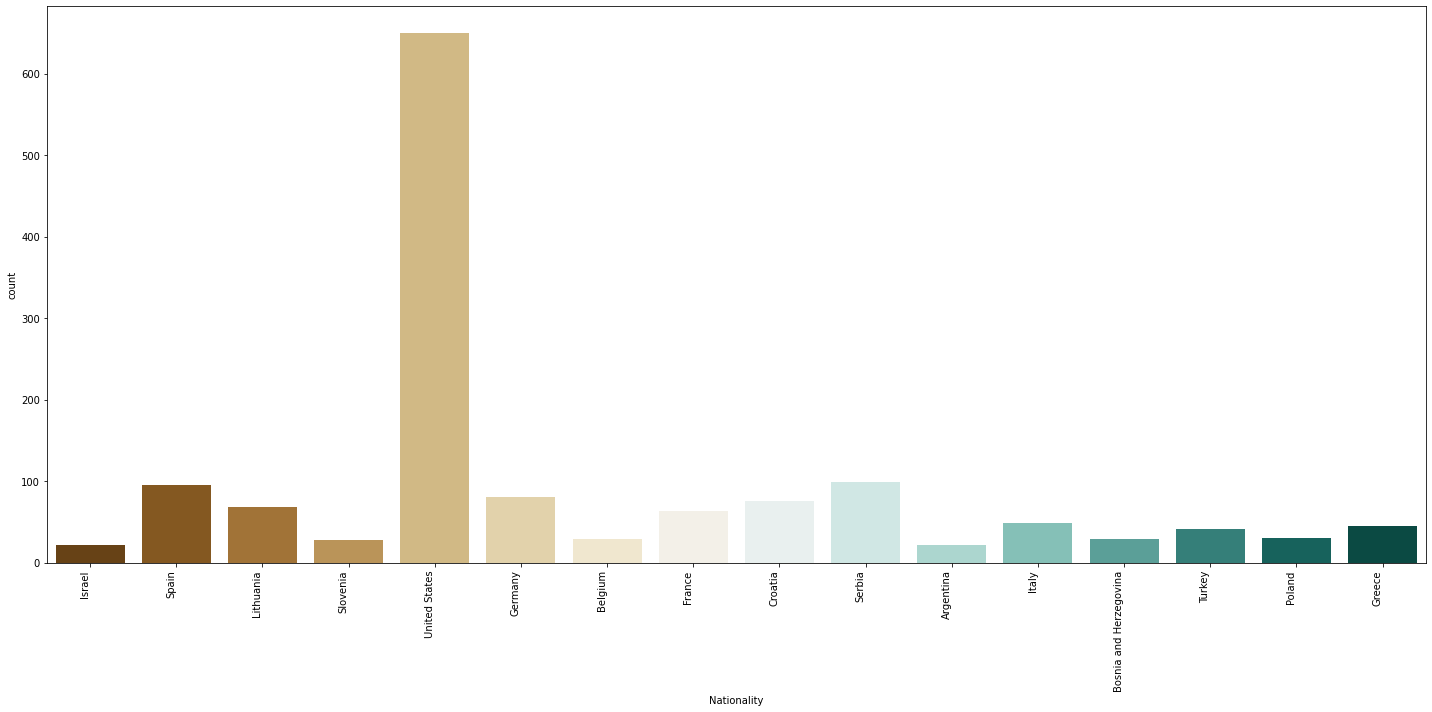

In [51]:
#Bar chart of Country of Origin of the players
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Nationality", data=df,palette='BrBG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


2. Histogram

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


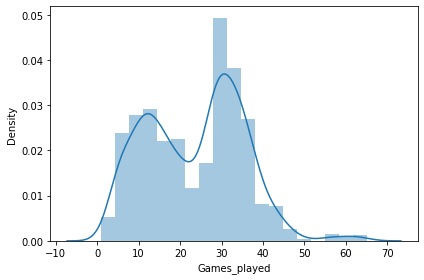

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Games_played'>

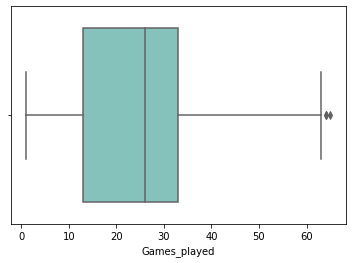

In [52]:
#Histogram and box plot for games played by the players
ax=sns.distplot(df["Games_played"])
plt.tight_layout()
plt.show()

sns.boxplot(df['Games_played'],palette='GnBu_r')

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


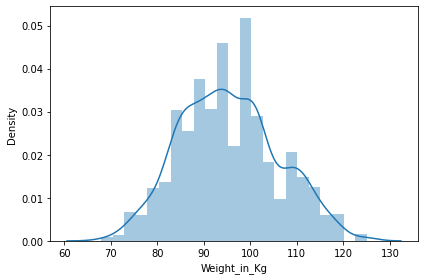

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_Kg'>

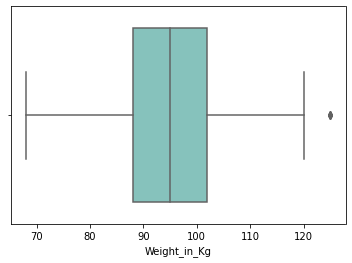

In [53]:
ax=sns.distplot(df["Weight_in_Kg"])
plt.tight_layout()
plt.show()

sns.boxplot(df['Weight_in_Kg'],palette='GnBu_r')

3.Boxplot

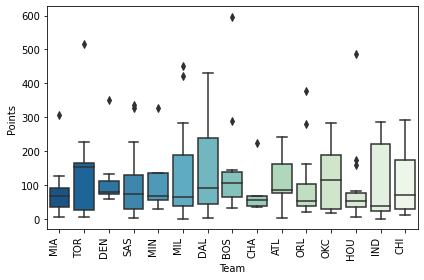

In [54]:
filter = df.loc[df['League'] =='NBA']
ax=sns.boxplot(y="Points",x ='Team' ,data = filter,palette='GnBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

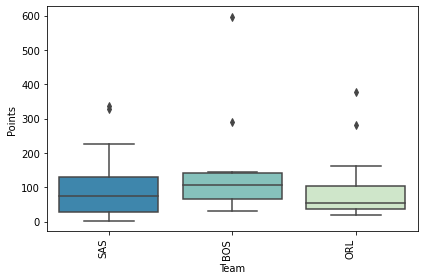

In [55]:
d = df.loc[df['League'] =='NBA']
options = ['SAS','BOS','ORL'] 
d = d[d['Team'].isin(options)] 
ax=sns.boxplot(y="Points",x ='Team' ,data = d,palette='GnBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


In [56]:
df.to_csv("final.csv")

# NORMALISATION

# Since the mean is 0 and standard deviation is 1 for all the numerical columns in the dataset, we can conclude that the data is standardized



# Reasons for the neccessity of normalization and the ways in which it affects datasets
Why should data be normalized and standardized :
So that we can bring all the values to a common without much distortion

How does normalization affect datasets :
Gets rid of the anomalies and the outliers which in turn plays a crucial role in inferential statistics

In [57]:
nba_data = pd.read_csv('final.csv')

In [58]:
nba_data.head()

,Unnamed: 0,League,Season,Stage,Player,Team,Birth_date,Nationality,High_School,Games_played,...,Fouls,Off_Reb,Def_Reb,Total_Reb,Assists,Steals,Blocks,Points,Height_in_cm,Weight_in_Kg
0,2,Eurocup,2015 - 2016,International,Yogev Ohayon,MAC,"Apr 24, 87",Israel,No School,2.0,...,6.0,1.0,1.0,2.0,7.0,3.0,0.0,5.0,188.0,86.0
1,5,Spanish-ACB,2014 - 2015,International,Alberto Diaz,MON,"Apr , 94",Spain,No School,34.0,...,71.0,20.0,57.0,77.0,82.0,35.0,1.0,141.0,188.0,85.0
2,11,Israeli-BSL,2012 - 2013,International,Rod Tishman,GAL,"May 12, 91",Israel,No School,29.0,...,37.0,4.0,1.0,5.0,27.0,14.0,5.0,71.0,188.0,90.0
3,12,Australian-NBL,2012 - 2013,International,Benas Veikalas,TBB,"Sep 24, 83",Lithuania,No School,37.0,...,82.0,9.0,73.0,82.0,45.0,17.0,6.0,415.0,188.0,90.0
4,13,Eurocup,2004 - 2005,International,Sani Becirovic,VAR,"May , 81",Slovenia,No School,10.0,...,26.0,12.0,21.0,33.0,46.0,21.0,0.0,180.0,188.0,89.0


# To display the mean and standard deviation of the columns in dataset

In [59]:
numMean = list()
numMean = nba_data[['Games_played', 'Minutes', 'FG_made', 'FG_Attempted', '3_Pointer_Made', '3_Pointer_Attempted', 'FT_Made', 'FT_Attempted', 'Turnovers', 'Fouls', 'Off_Reb', 'Def_Reb', 'Total_Reb', 'Assists', 'Steals', 'Blocks', 'Points', 'Height_in_cm', 'Weight_in_Kg']].mean()
numMean


Games_played            23.707163
Minutes                498.611798
FG_made                 76.327559
FG_Attempted           148.436732
3_Pointer_Made          22.402911
3_Pointer_Attempted     60.588694
FT_Made                 40.475293
FT_Attempted            52.866992
Turnovers               34.327949
Fouls                   53.578652
Off_Reb                 20.849719
Def_Reb                 56.356742
Total_Reb               77.206461
Assists                 39.774579
Steals                  19.173455
Blocks                   5.214185
Points                 194.478297
Height_in_cm           194.904922
Weight_in_Kg            95.423101
dtype: float64

In [60]:
numVar = list()
numVar = nba_data[['Games_played', 'Minutes', 'FG_made', 'FG_Attempted', '3_Pointer_Made', '3_Pointer_Attempted', 'FT_Made', 'FT_Attempted', 'Turnovers', 'Fouls', 'Off_Reb', 'Def_Reb', 'Total_Reb', 'Assists', 'Steals', 'Blocks', 'Points', 'Height_in_cm', 'Weight_in_Kg']].var()
numVar

Games_played              138.939485
Minutes                104917.405159
FG_made                  2276.205051
FG_Attempted            11683.504860
3_Pointer_Made            404.634059
3_Pointer_Attempted      2579.139028
FT_Made                   844.319645
FT_Attempted             1409.010427
Turnovers                 460.124981
Fouls                     809.979755
Off_Reb                   330.626732
Def_Reb                  1666.179041
Total_Reb                2985.840689
Assists                  1004.273113
Steals                    180.213743
Blocks                     33.586559
Points                  20738.741206
Height_in_cm               88.605863
Weight_in_Kg              110.341503
dtype: float64

In [61]:
numCol = ['Games_played', 'Minutes', 'FG_made', 'FG_Attempted', '3_Pointer_Made', '3_Pointer_Attempted', 'FT_Made', 'FT_Attempted', 'Turnovers', 'Fouls', 'Off_Reb', 'Def_Reb', 'Total_Reb', 'Assists', 'Steals', 'Blocks', 'Points', 'Height_in_cm', 'Weight_in_Kg']
len(numCol)

19

In [62]:
cat_data = nba_data.select_dtypes(exclude=["number"])
num_data = nba_data.select_dtypes(include=["number"])


# To calculate Standardised values

In [63]:
for e in num_data :
        num_data[e] = (num_data[e] - num_data[e].mean())/num_data[e].std()
        #using the formula z score = (x-mean)/std

In [64]:
nba_cleaned = cat_data.join(num_data)


In [65]:
nba_cleaned.head()

,League,Season,Stage,Player,Team,Birth_date,Nationality,High_School,Unnamed: 0,Games_played,...,Fouls,Off_Reb,Def_Reb,Total_Reb,Assists,Steals,Blocks,Points,Height_in_cm,Weight_in_Kg
0,Eurocup,2015 - 2016,International,Yogev Ohayon,MAC,"Apr 24, 87",Israel,No School,-1.733127,-1.841578,...,-1.671764,-1.091655,-1.356156,-1.376328,-1.034216,-1.204783,-0.899712,-1.315735,-0.733546,-0.897066
1,Spanish-ACB,2014 - 2015,International,Alberto Diaz,MON,"Apr , 94",Spain,No School,-1.731165,0.873217,...,0.612131,-0.046731,0.015759,-0.003778,1.332441,1.178941,-0.727162,-0.371353,-0.733546,-0.992265
2,Israeli-BSL,2012 - 2013,International,Rod Tishman,GAL,"May 12, 91",Israel,No School,-1.727242,0.449030,...,-0.582522,-0.926667,-1.356156,-1.321426,-0.403107,-0.385378,-0.036958,-0.857432,-0.733546,-0.516272
3,Australian-NBL,2012 - 2013,International,Benas Veikalas,TBB,"Sep 24, 83",Lithuania,No School,-1.726588,1.127729,...,0.998637,-0.651687,0.407735,0.087725,0.164890,-0.161904,0.135593,1.531300,-0.733546,-0.516272
4,Eurocup,2004 - 2005,International,Sani Becirovic,VAR,"May , 81",Slovenia,No School,-1.725935,-1.162880,...,-0.969027,-0.486699,-0.866186,-0.809007,0.196446,0.136062,-0.899712,-0.100537,-0.733546,-0.611470


In [66]:
nba_cleaned

,League,Season,Stage,Player,Team,Birth_date,Nationality,High_School,Unnamed: 0,Games_played,...,Fouls,Off_Reb,Def_Reb,Total_Reb,Assists,Steals,Blocks,Points,Height_in_cm,Weight_in_Kg
0,Eurocup,2015 - 2016,International,Yogev Ohayon,MAC,"Apr 24, 87",Israel,No School,-1.733127,-1.841578,...,-1.671764,-1.091655,-1.356156,-1.376328,-1.034216,-1.204783,-0.899712,-1.315735,-0.733546,-0.897066
1,Spanish-ACB,2014 - 2015,International,Alberto Diaz,MON,"Apr , 94",Spain,No School,-1.731165,0.873217,...,0.612131,-0.046731,0.015759,-0.003778,1.332441,1.178941,-0.727162,-0.371353,-0.733546,-0.992265
2,Israeli-BSL,2012 - 2013,International,Rod Tishman,GAL,"May 12, 91",Israel,No School,-1.727242,0.449030,...,-0.582522,-0.926667,-1.356156,-1.321426,-0.403107,-0.385378,-0.036958,-0.857432,-0.733546,-0.516272
3,Australian-NBL,2012 - 2013,International,Benas Veikalas,TBB,"Sep 24, 83",Lithuania,No School,-1.726588,1.127729,...,0.998637,-0.651687,0.407735,0.087725,0.164890,-0.161904,0.135593,1.531300,-0.733546,-0.516272
4,Eurocup,2004 - 2005,International,Sani Becirovic,VAR,"May , 81",Slovenia,No School,-1.725935,-1.162880,...,-0.969027,-0.486699,-0.866186,-0.809007,0.196446,0.136062,-0.899712,-0.100537,-0.733546,-0.611470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,Greek-HEBA-A1,2018 - 20,International,Quincy Diggs,KOL,"Apr 8, 90",United States,Plano East Senior High School,1.736120,-0.314506,...,-0.687932,-0.431703,0.652719,0.343934,-0.024442,0.806484,-0.209509,-0.329689,-0.733546,-0.040279
1420,Argentinian-Liga-A,2017 - 2018,International,Javier Saiz,REG,"Feb 26, 94",Argentina,No School,1.736773,1.042892,...,0.331037,0.778209,1.436671,1.332170,-0.055998,-0.236395,3.241509,0.406374,0.005942,-0.040279
1421,Spanish-ACB,2013 - 2014,International,John Shurna,JOV,"Apr 30, 90",United States,Glenbard West High School,1.741350,0.873217,...,0.858089,0.448233,1.020197,0.911254,-0.276886,0.136062,0.825797,1.420196,1.178689,0.245317
1422,British-BBL,2016 - 2017,International,Donatas Visockis,MAN,"Jan 4, 86",Lithuania,Cardinal Gibbons High School,1.756388,0.533868,...,0.190489,0.338241,0.799710,0.709947,0.038669,-1.130292,0.308144,-0.336633,1.391159,0.435714


In [67]:
df1 = pd.DataFrame(nba_cleaned.mean(), columns = ["Normalized Mean"]).round(10) #Mean rounded off to 10 decimal places

df2 = pd.DataFrame(nba_cleaned.var(), columns = ["Normalized Variance"]) #Variance
df3 = pd.concat([df1, df2], axis=1, sort=False)

df3

,Normalized Mean,Normalized Variance
Unnamed: 0,0.0,1.0
Games_played,0.0,1.0
Minutes,0.0,1.0
FG_made,0.0,1.0
FG_Attempted,-0.0,1.0
3_Pointer_Made,-0.0,1.0
3_Pointer_Attempted,0.0,1.0
FT_Made,0.0,1.0
FT_Attempted,0.0,1.0
Turnovers,0.0,1.0


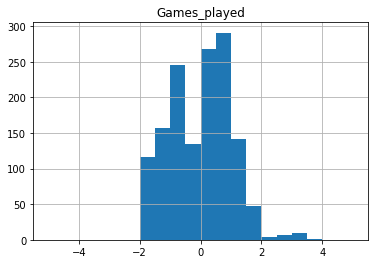

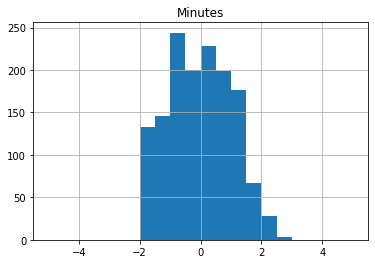

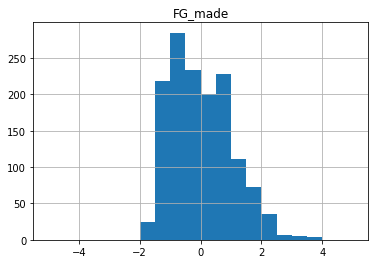

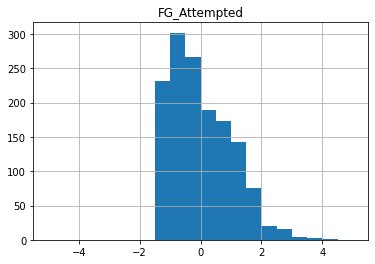

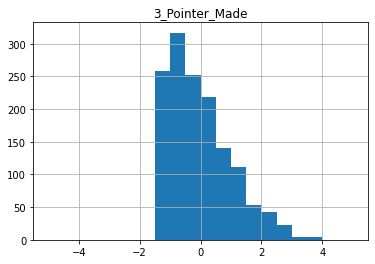

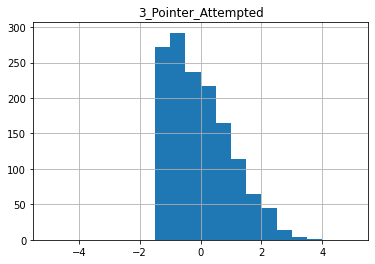

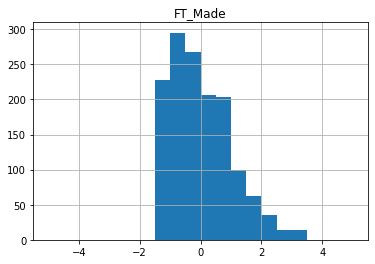

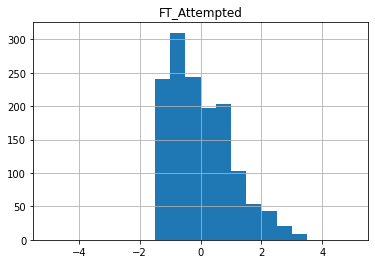

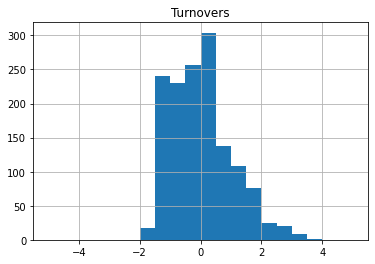

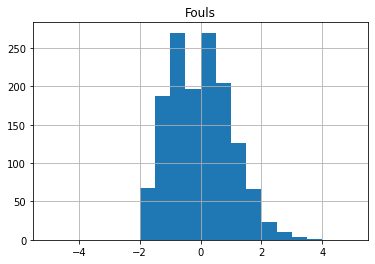

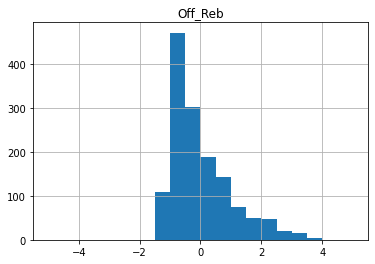

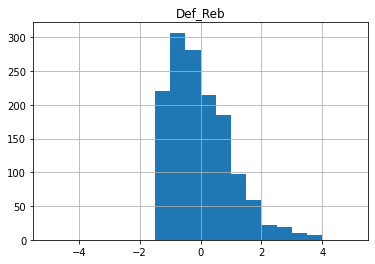

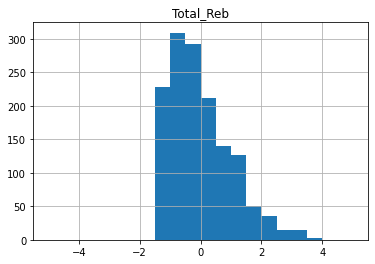

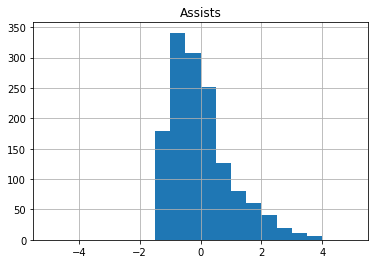

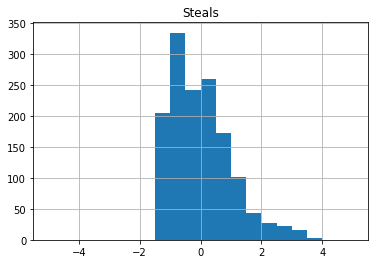

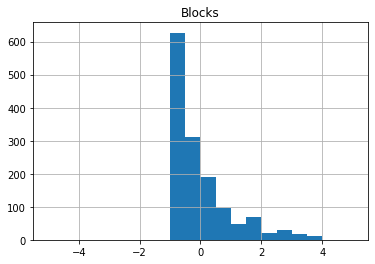

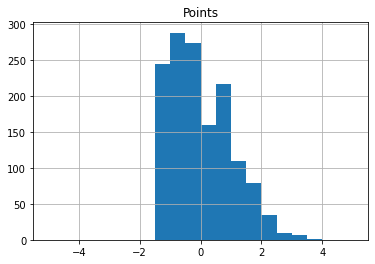

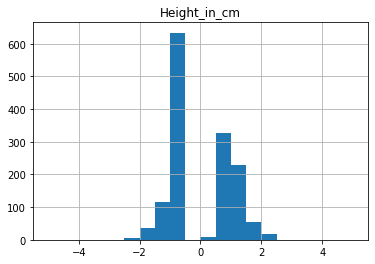

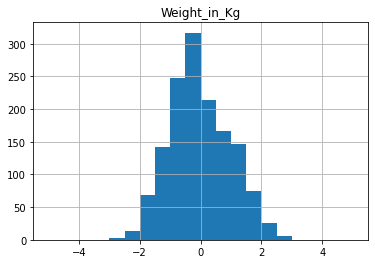

In [68]:
for i in range(19):
    plotVar = pd.DataFrame({f'{numCol[i]}': nba_cleaned[numCol[i]]})
    plotVar.hist(bins=20, range={-5, 5})
    

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


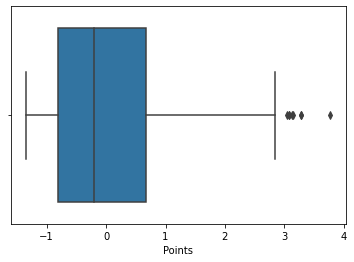

In [69]:
sns.boxplot(nba_cleaned['Points'])
plt.show()

There are some Outliers because there will be one player from each team who scores more number of points and therefore cannot be ignored

In [70]:
nba_cleaned.to_csv('Cleaned_Standardized_NBA_Dataset.csv')

No. of observations before eliminating the outliers: 1424
In the column: Games_played


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


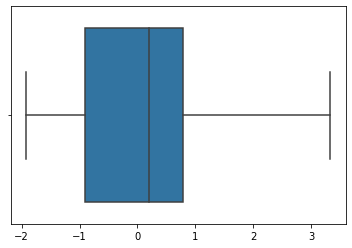

No. of observations after eliminating the outliers: 1421
Therefore we have found  3  outliers
No. of observations before eliminating the outliers: 1424
In the column: Minutes


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


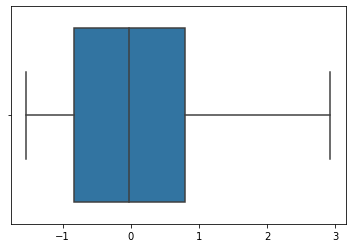

No. of observations after eliminating the outliers: 1424
Therefore we have found  0  outliers
No. of observations before eliminating the outliers: 1424
In the column: FG_made


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


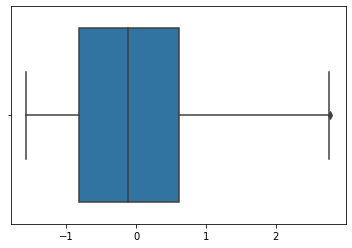

No. of observations after eliminating the outliers: 1415
Therefore we have found  9  outliers
No. of observations before eliminating the outliers: 1424
In the column: FG_Attempted


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


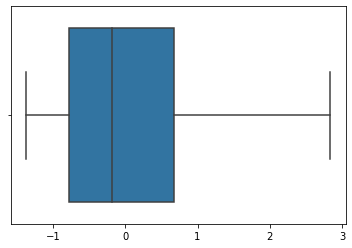

No. of observations after eliminating the outliers: 1412
Therefore we have found  12  outliers
No. of observations before eliminating the outliers: 1424
In the column: 3_Pointer_Made


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


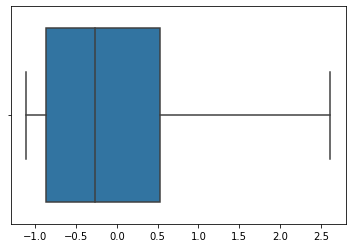

No. of observations after eliminating the outliers: 1399
Therefore we have found  25  outliers
No. of observations before eliminating the outliers: 1424
In the column: 3_Pointer_Attempted


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


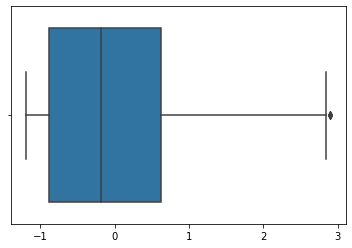

No. of observations after eliminating the outliers: 1416
Therefore we have found  8  outliers
No. of observations before eliminating the outliers: 1424
In the column: FT_Made


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


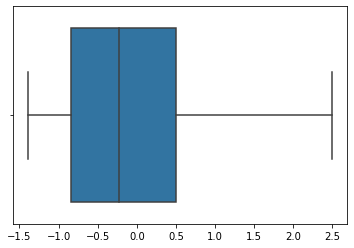

No. of observations after eliminating the outliers: 1396
Therefore we have found  28  outliers
No. of observations before eliminating the outliers: 1424
In the column: FT_Attempted


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


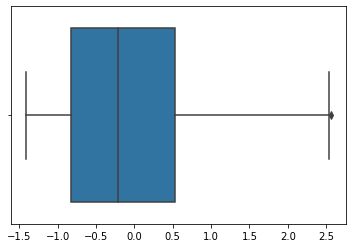

No. of observations after eliminating the outliers: 1399
Therefore we have found  25  outliers
No. of observations before eliminating the outliers: 1424
In the column: Turnovers


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


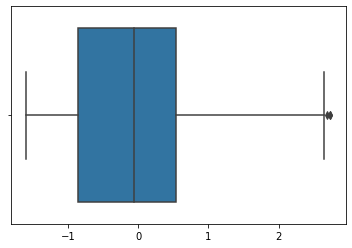

No. of observations after eliminating the outliers: 1407
Therefore we have found  17  outliers
No. of observations before eliminating the outliers: 1424
In the column: Fouls


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


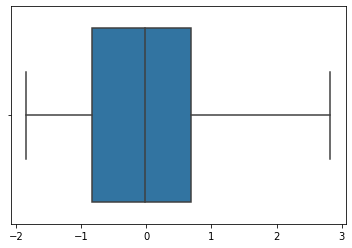

No. of observations after eliminating the outliers: 1419
Therefore we have found  5  outliers
No. of observations before eliminating the outliers: 1424
In the column: Off_Reb


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


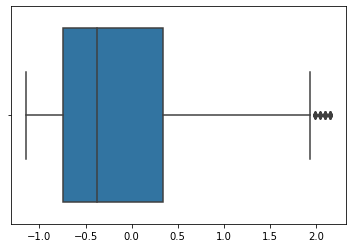

No. of observations after eliminating the outliers: 1358
Therefore we have found  66  outliers
No. of observations before eliminating the outliers: 1424
In the column: Def_Reb


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


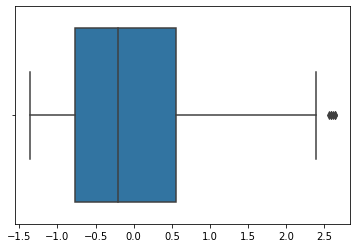

No. of observations after eliminating the outliers: 1394
Therefore we have found  30  outliers
No. of observations before eliminating the outliers: 1424
In the column: Total_Reb


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


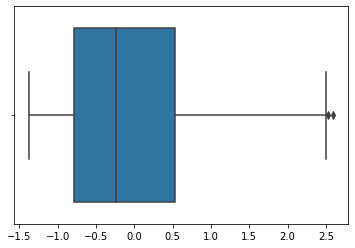

No. of observations after eliminating the outliers: 1397
Therefore we have found  27  outliers
No. of observations before eliminating the outliers: 1424
In the column: Assists


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


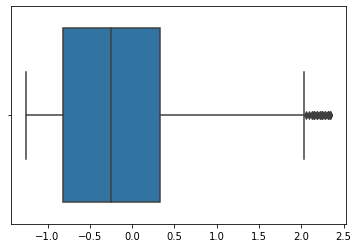

No. of observations after eliminating the outliers: 1376
Therefore we have found  48  outliers
No. of observations before eliminating the outliers: 1424
In the column: Steals


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


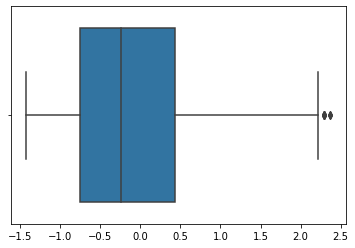

No. of observations after eliminating the outliers: 1382
Therefore we have found  42  outliers
No. of observations before eliminating the outliers: 1424
In the column: Blocks


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


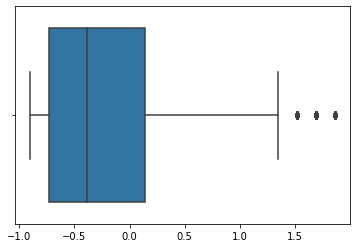

No. of observations after eliminating the outliers: 1341
Therefore we have found  83  outliers
No. of observations before eliminating the outliers: 1424
In the column: Points


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


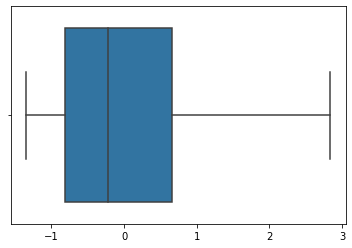

No. of observations after eliminating the outliers: 1416
Therefore we have found  8  outliers
No. of observations before eliminating the outliers: 1424
In the column: Height_in_cm


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


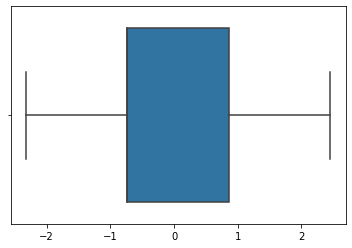

No. of observations after eliminating the outliers: 1424
Therefore we have found  0  outliers
No. of observations before eliminating the outliers: 1424
In the column: Weight_in_Kg


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


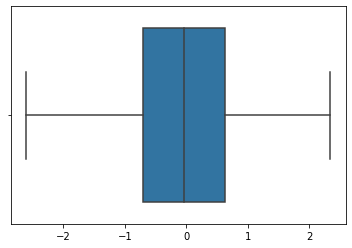

No. of observations after eliminating the outliers: 1418
Therefore we have found  6  outliers


In [71]:
# Removal of outliers from normalized dataset.

for i in numCol:
    valid_values=[]
    outliers = []
    print('No. of observations before eliminating the outliers:',len(nba_cleaned['Points']))
    print("In the column:",i)
    for j in nba_cleaned[i]:
        
        init_dfa_len=len(nba_cleaned[i])
        Q1,Q3=nba_cleaned[i].quantile([0.25,0.75])

        IQR=Q3-Q1
        if (j < Q3+1.5*IQR):#if the values are lesser than the maximum value store it in valid_values list else in outliers list.
            valid_values.append(j)
        else:
            outliers.append(j)#list of all the outliers
    sns.boxplot(valid_values)
    plt.show()
    print('No. of observations after eliminating the outliers:',len(valid_values))
    final_dfa_len=len(valid_values)

    print('Therefore we have found ', init_dfa_len-final_dfa_len ,' outliers')




# HYPOTHESIS TESTING

In [72]:
nba_data = pd.read_csv('final.csv')
nba_data.head()

,Unnamed: 0,League,Season,Stage,Player,Team,Birth_date,Nationality,High_School,Games_played,...,Fouls,Off_Reb,Def_Reb,Total_Reb,Assists,Steals,Blocks,Points,Height_in_cm,Weight_in_Kg
0,2,Eurocup,2015 - 2016,International,Yogev Ohayon,MAC,"Apr 24, 87",Israel,No School,2.0,...,6.0,1.0,1.0,2.0,7.0,3.0,0.0,5.0,188.0,86.0
1,5,Spanish-ACB,2014 - 2015,International,Alberto Diaz,MON,"Apr , 94",Spain,No School,34.0,...,71.0,20.0,57.0,77.0,82.0,35.0,1.0,141.0,188.0,85.0
2,11,Israeli-BSL,2012 - 2013,International,Rod Tishman,GAL,"May 12, 91",Israel,No School,29.0,...,37.0,4.0,1.0,5.0,27.0,14.0,5.0,71.0,188.0,90.0
3,12,Australian-NBL,2012 - 2013,International,Benas Veikalas,TBB,"Sep 24, 83",Lithuania,No School,37.0,...,82.0,9.0,73.0,82.0,45.0,17.0,6.0,415.0,188.0,90.0
4,13,Eurocup,2004 - 2005,International,Sani Becirovic,VAR,"May , 81",Slovenia,No School,10.0,...,26.0,12.0,21.0,33.0,46.0,21.0,0.0,180.0,188.0,89.0


In [73]:
## Research Hypothesis

We know that the number of successful shots made by a player must be lesser than or equal to the number of total attempted shots. 


Our hypothesis test whether our dataset falls in line with this fact.

SyntaxError: invalid syntax (<ipython-input-73-87c200353b33>, line 3)

### Defining the Null and Alternate Hypothesis:

H0: Mean of FG_made - Mean of FG_Attempted > 0

H1: Mean of FG_made - Mean of FG_Attempted <= 0

In [ ]:
mean_FG_made = nba_data['FG_made'].mean()
mean_FG_Attempted = nba_data['FG_Attempted'].mean()

sd_FG_made = math.sqrt(nba_data['FG_made'].var())
sd_FG_Attempted = math.sqrt(nba_data['FG_Attempted'].var())

n_FG_made = len(nba_data['FG_made'])
n_FG_Attempted = len(nba_data['FG_Attempted'])

![formula](./formula.JPEG)

Here delta is zero

In [ ]:
z = (mean_FG_made - mean_FG_Attempted) / math.sqrt((math.pow(sd_FG_made, 2)/n_FG_made) + (math.pow(sd_FG_Attempted, 2)/n_FG_Attempted))
z

# Decision on whether the null hypothesis is supported or rejected

# 5% statistical significance

z value at 5% is 1.645. Since the obtained z value is much lesser than that at 5%, we can strongly reject the null hypothesis and also say that the alternate hypothesis is highly probable. The extremely low value of z is due to the reason that NULL hypothesis turning out to be true in this case would indicate a factual error.

# CORRELATION

# Correlation b/w variables that are positively and negatively related

In [ ]:
basketball_data = pd.read_csv('final.csv')

In [ ]:
corr_data = basketball_data.corr(method="pearson")

In [ ]:
corr_data

In [ ]:
# Compute the correlation matrix
corr_data = basketball_data.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data, mask=mask, vmax=.3, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},cmap='YlOrRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# With the help of the above tabular data we state the correlation between vaiables in the dataset

1. As you can see the 3_Pointer_Made,FT_Made,FG_Made are positively correlated to
    3_Pointer_Attempted,FT_Attempted,FG_Attempted. This can be proved pratically also, as the number of shots made by the player 
    will always increase with the number of attempts he takes.
2. Taller players shoot less number of 3 Pointers which is evident in the tabular data given above . Therefore making it a
    negatively correlated variable pairs.Similary the 3 pointers attempts and height of the player is inversely proportional.
    Therefore they are negatively correlated.
    But these variables are not strongly negatively correlated.



-------------------------------------------------------------XXXX--------------------------------------------------------------